In [2]:
## Generate d-regular graph
#!/usr/bin/env python
#copyright Igor Rivin 2003, all rights reserved.
#generate a deg-regular graph on n vertices, or a bipartite graph where
#the degree of  blue vertices is deg1 and of the red vertices is
#deg2. The algorithm is that of Wormald. The general algorithm uses
#the bipartite algorthim (where the blue vertices are the n vertices
#of the graph, and the red vertices are the edges of the graph (their
#degree is 2)). The algorithm scales rather badly in degree, and is
#not really usable (in the non-bipartite version) if the degree is
#greater than 5. It is very fast, however, when the degree is no greater
#than 5. For analysis, please see Wormald's paper entitled "Generating
#random unlabelled graphs", in SIAM Journal of Computing 16(1987),
#no. 4, pp. 717-727. The output is the list of edges (for general
#graph) and the list of neighbor lists (for bipartite graphs).
#Historical note: this algorithm was originally implemented in C, but
#since a lot of time is spent in the random number generator, the
#Python implementation slows down only by about a factor of five
#(empirically). 

import random
import sys
import string
import getopt


def maketry(size, deg1):
    frog = list(range(size * deg1))
    for i in range(size):
        j = i * deg1
        for k in range(deg1):
            frog[j + k] = i

    random.shuffle(frog)
    return frog

#special hack for lists of length 2
def checkaux2(l):
    if l[0] == l[1]:
        return False
    return True

def checkaux(l):
    testd = dict()
    for i in l:
        if testd.has_key(i):
            return False
        else:
            testd[i] = 0
    return True
    
def checkres(graph, size, deg1, deg2):
    if deg2 != 2:
        for i in range((size * deg1)/deg2):
            ar = graph[i * deg2 : (i+1) * deg2]
            if not checkaux(ar):
                return False
        return True
    else:
        for i in range(int((size * deg1)/deg2)):
            ar = graph[i * deg2 : (i+1) * deg2]
            if not checkaux2(ar):
                return False
        return True
    
#generate a bipartite graph with size blue vertices each of degree deg1 and
#red vertices of deg2

def makebip(size, deg1, deg2):
    if (size * deg1)%deg2:
        raise SystemExit("incompatible sizes")
    while True:
        thetry = maketry(size, deg1)
        if checkres(thetry, size, deg1, deg2):
            return thetry

#check that a list of pairs with each element between 0 and size - 1 has no
#duplicates.

def nodups(l, size):
    d = dict()
    for i in l:
        code = i[0] * size + i[1]
        if code in d:
            return False
        d[code] = True
    return True

def biedgelist(glist, deg1,  deg2):
    realsize = len(glist)/deg2
    numred   = len(glist)/deg1
    vlist = range(realsize)
    for v in range(realsize):
        neighbors = [v+numred, glist[v * deg2:(v+1) * deg2]]
        vlist[v] = neighbors
    return vlist

#print a list of edges of the graph represented by glist.

def edgelist(glist):
    realsize = int(len(glist)/2)
    elist = list(range(realsize))
    for i in range(realsize):
        v1 = glist[2*i]
        v2 = glist[2*i+1]
        if v1 < v2:
            elist[i] = [v1, v2]
        else:
            elist[i] = [v2, v1]
    return elist

#generate a graph with size vertices and degree deg.

def makegen(size, deg):
    if (size * deg % 2):
        raise SystemExit("incompatible degree")
    while True:
        bitry = edgelist(makebip(size, deg, 2))
        if nodups(bitry, size * deg/2):
            return bitry

def usage():
    print("to get this usage info, do graphgen -u")
    print("to generate a random d-regular graph with n vertices,\n\
    try graphgen n d")
    print("to generate a random bipartite graph with b blue vertices of \n\
    degree d1 and the red vertices of degree d2, try\n\
    graphgen -b d1 d2")
    print("the -N option makes the program loop and generate N graphs")


def main(argv):
    (opts, args) = getopt.getopt(argv[1:], "bN:")
    if len(args) < 2:
        usage()
        sys.exit(1)
    bipartite = False
    N = 1
    for i in opts:
        if i[0] == "-b":
            bipartite = True
        elif i[0]=="-N":
            N = int(i[1])
        else:
            usage()
            sys.exit(1)
    if not bipartite:
        size = int(args[0])
        deg = int(args[1])
        for j in range(N):
            ng = makegen(size, deg)
            for i in ng:
                print(i)
    else:
        try:
            size = int(args[0])
            deg1 = int(args[1])
            deg2 = int(args[2])
        except:
            sys.stderr.write("wrong number of args; try graphgen -u for usage info\n")
            sys.exit(2)
        for j in range(N):
            ng = makebip(size, deg1, deg2)
            for i in biedgelist(ng, deg1, deg2):
                print(i)


        



In [5]:
## Plot the eigenvalues of a d-regular graph on N vertices.
import numpy as np
import matplotlib.pyplot as plt

def regGraph(N,d):
    elist=makegen(N,d)
    A=np.zeros((N,N))
    for e in elist:
        A[e[0],e[1]]=1
        A[e[1],e[0]]=1

    return A


def plotev(N,d):

    A=regGraph(N,d)
    D = np.linalg.eigvalsh(A)

    plt.hist(D,density=True, bins=50)


    x=np.arange(-2*np.sqrt(d-1),2*np.sqrt(d-1),0.0001)
    print(x)
    l=len(x)
    y=np.zeros(l)
    for i in range(l):
        y[i]=d*np.sqrt(4*(d-1)-x[i]*x[i])/(2*np.pi*(d*d-x[i]*x[i]))
    print(y)
    plt.plot(x,y)

    plt.show()

    

[-3.46410162 -3.46400162 -3.46390162 ...  3.46389838  3.46399838
  3.46409838]
[6.70787928e-09 4.18843801e-03 5.92227755e-03 ... 5.96987745e-03
 4.25552429e-03 7.52916317e-04]


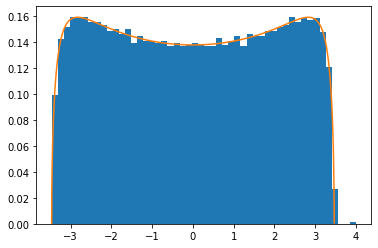

In [15]:
plotev(5000,4)


In [6]:
## Diagonalize the local resampling matrix.
# the matrix is parametrized by (l, a,a,...a,b,b...b,c,c...c)
# it corresponds to the switching data by removing (l,a_i), (b_i,c_i) and adding (l, c_i), (a_i, b_i).

def switchM(d):
    k=d-1
    A=np.zeros((3*k+1, 3*k+1))
    for i in range(k):
        A[0,i+1]=1
        A[i+1,0]=1
        A[0,2*k+i+1]=-1
        A[2*k+i+1,0]=-1
        
        A[2*k+i+1,k+i+1]=1
        A[k+i+1,2*k+i+1]=1
        
        A[k+i+1,i+1]=-1
        A[i+1,k+i+1]=-1
    print(A)
    return A

def decomp(d):
    A=switchM(d)
    vals, vecs = np.linalg.eigh(A)

    return(vals, vecs)

#It sees it has d-1 positive eigenvalues given by \sqrt(2d), \sqrt 2, \sqrt 2,...\sqrt 2
# and d-1 negative eigenvalues given their negations. 
#It remains to figure out the eigenvectors.